# Leyton Orient Post-Match Report

- Round 27 of the League one season saw Reading play Leyton Oriend Away.
- Match ended in a 3-1 Loss.

# Analysis included in this Post-Match Report

- Top Stats Comparison
- Attacking Stats Comparion
- Passing/Possession Stats Comparison
- Defensive Stats Comparison
- Goalkeeper Comparison

# Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../../data/rfc_matchdata.csv')

# Filtering for correct match
df_match = df[(df["Opponent"] == "Leyton Orient") & (df["Venue"] == "A")].reset_index(drop=True)

match = df_match.iloc[0]


- "rfc" = Reading FC based stat
- "opp" = Opponent based stat

In [2]:
for col in df.columns:
    print(col)


Opponent
Round
Date
Manager
rfc_league_position
opp_league_position
rfc_Score
opp_Score
Result
Venue
rfc_xG_1st
rfc_xG_2nd
rfc_xG
rfc_Possession_1st
rfc_Possession_2nd
rfc_Possesion
rfc_Shots_1st
rfc_Shots_2nd
rfc_Shots
rfc_SOT_1st
rfc_SOT_2nd
rfc_SOT
rfc_BigChances_1st
rfc_BigChances_2nd
rfc_BigChances
rfc_Corners_1st
rfc_Corners_2nd
rfc_Corners
rfc_Passes_1st
rfc_Passes_2nd
rfc_Passes
rfc_Pass%_1st
rfc_Pass%_2nd
rfc_Pass%
rfc_Shots_Inside_Box_1st
rfc_Shots_Inside_Box_2nd
rfc_Shots_Inside_Box
rfc_Shots_Outside_Box_1st
rfc_Shots_Outside_Box_2nd
rfc_Shots_Outside_Box
rfc_Touches_In_Opp_Box_1st
rfc_Touches_In_Opp_Box_2nd
rfc_Touches_In_Opp_Box
rfc_Long_Passes_1st
rfc_Long_Passes_2nd
rfc_Long_Passes
rfc_LongPass%_1st
rfc_LongPass%_2nd
rfc_LongPass%
rfc_Passes_In_Final_Third_1st
rfc_Passes_In_Final_Third_2nd
rfc_Passes_In_Final_Third
rfc_Pass_In_Final_Third%_1st
rfc_Pass_In_Final_Third%_2nd
rfc_Pass_In_Final_Third%
rfc_Crosses_1st
rfc_Crosses_2nd
rfc_Crosses
rfc_Cross%_1st
rfc_Cross%_2nd
r

# Comparing Reading vs Leyton Orient Top Stats

Top Stats Include:

- xG = Expected Goals to have been scored
- Possession
- Shots
- Shots on Target
- Big chances
- Corners
- Passes
- Pass Accuaracy

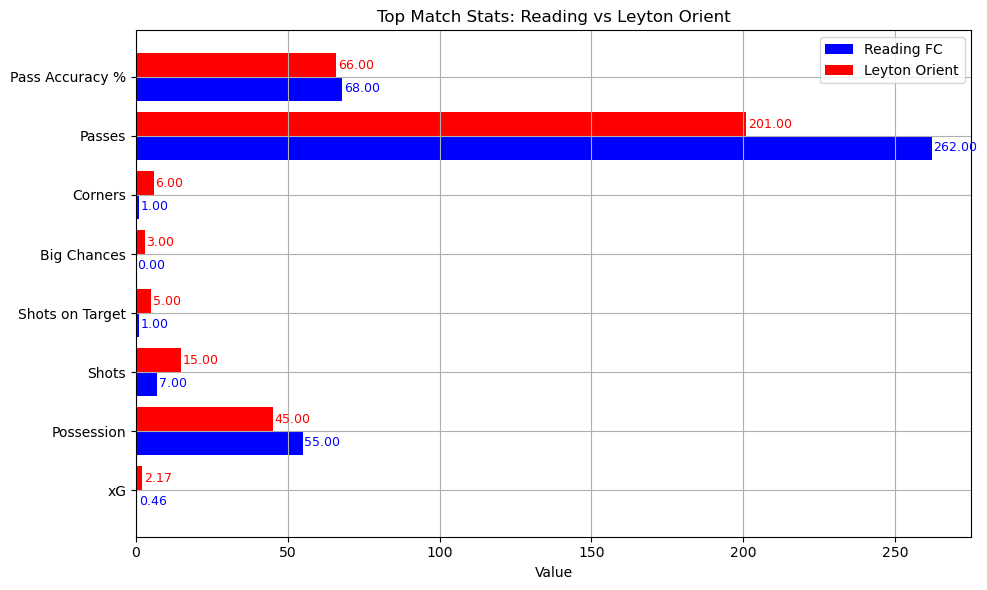

In [3]:
top_stats = {
    'xG': (match['rfc_xG_1st'] + match['rfc_xG_2nd'], match['opp_xG_1st'] + match['opp_xG_2nd']),
    'Possession': (match['rfc_Possesion'], match['opp_Possesion']),
    'Shots': (match['rfc_Shots'], match['opp_Shots']),
    'Shots on Target': (match['rfc_SOT'], match['opp_SOT']),
    'Big Chances': (match['rfc_BigChances'], match['opp_BigChances']),
    'Corners': (match['rfc_Corners'], match['opp_Corners']),
    'Passes': (match['rfc_Passes'], match['opp_Passes']),
    'Pass Accuracy %': (match['rfc_Pass%'], match['opp_Pass%'])
}

# Convert to DataFrame
basic_df = pd.DataFrame(top_stats, index=['Reading FC', 'Leyton Orient']).T

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
y = range(len(basic_df))

# Reading FC bars
reading_bars = ax.barh(
    [i - bar_width / 2 for i in y],
    basic_df['Reading FC'],
    height=bar_width,
    label='Reading FC',
    color='blue'
)

# Opponent bars
opp_bars = ax.barh(
    [i + bar_width / 2 for i in y],
    basic_df['Leyton Orient'],
    height=bar_width,
    label='Leyton Orient',
    color='red'
)

# Adding data labels
for bar in reading_bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width + 0.5, y_pos, f'{width:.2f}', va='center', ha='left', color='blue', fontsize=9)

for bar in opp_bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width + 0.5, y_pos, f'{width:.2f}', va='center', ha='left', color='red', fontsize=9)

# Final formatting
ax.set_yticks(y)
ax.set_yticklabels(basic_df.index)
ax.set_xlabel("Value")
ax.set_title("Top Match Stats: Reading vs Leyton Orient")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [4]:
#checking averages for either Home or Away games 

venue_df = df[df["Venue"] == "A"]  

reading_avgs = {
    "xG": venue_df["rfc_xG"].mean(),
    "Possession %": venue_df["rfc_Possesion"].mean(),
    "Shots": venue_df["rfc_Shots"].mean(),
    "Shots on Target": venue_df["rfc_SOT"].mean(),
    "Big Chances": venue_df["rfc_BigChances"].mean(),
    "Corners": venue_df["rfc_Corners"].mean(),
    "Passes": venue_df["rfc_Passes"].mean(),
    "Pass Accuracy %": venue_df["rfc_Pass%"].mean()
}

opp_avgs = {
    "xG": venue_df["opp_xG"].mean(),
    "Possession %": venue_df["opp_Possesion"].mean(),
    "Shots": venue_df["opp_Shots"].mean(),
    "Shots on Target": venue_df["opp_SOT"].mean(),
    "Big Chances": venue_df["opp_BigChances"].mean(),
    "Corners": venue_df["opp_Corners"].mean(),
    "Passes": venue_df["opp_Passes"].mean(),
    "Pass Accuracy %": venue_df["opp_Pass%"].mean()
}

# Combine both dicts into a DataFrame correctly
venue_avg_df = pd.DataFrame({
    "RFC Average": reading_avgs,
    "Opp Average": opp_avgs
})

print(venue_avg_df.round(2))


                 RFC Average  Opp Average
xG                      1.20         1.46
Possession %           48.00        52.08
Shots                  11.42        12.92
Shots on Target         4.08         4.00
Big Chances             2.00         2.50
Corners                 4.75         4.42
Passes                274.00       317.67
Pass Accuracy %        72.50        76.17


# Reading FC Attack Analysis

- Looking at Attacking stats
- Attacking efficiency
- 1st Half vs 2nd Half Comparisons
- Match Momentum into Attacking areas
- Main Attacking Performance vs Huddersfield

Attacking metrics:

- xG = Expected Goals to have been scored
- Shots
- Shots on Target
- Big Chances
- Touches in the Opponents Box
- Crosses
- xA = Expected Assists

In [5]:
# --- Reading FC calculations ---
goals = match['rfc_Score']
shots = match['rfc_Shots']
xg = match['rfc_xG_1st'] + match['rfc_xG_2nd']
big_chances = match['rfc_BigChances']
sot = match['rfc_SOT']
touches_in_box = match['rfc_Touches_In_Opp_Box_1st'] + match['rfc_Touches_In_Opp_Box_2nd']

# Opponent GK metrics (for Reading's attack)
xgot = match['opp_xGOT_Faced_1st'] + match['opp_xGOT_Faced_2nd']
gk_prevented = match['opp_GK_Goals_Prevented_1st'] + match['opp_GK_Goals_Prevented_2nd']

# Final third penetration
total_passes = match['rfc_Passes']
final_third_passes = match['rfc_Passes_In_Final_Third']
final_third_penetration = final_third_passes / total_passes if total_passes else 0

# Shot location ratio
inside_box_shots = match['rfc_Shots_Inside_Box']
inside_box_ratio = inside_box_shots / shots if shots else 0
outside_box_shots = match['rfc_Shots_Outside_Box']
outside_box_ratio = outside_box_shots / shots if shots else 0

# Efficiency dictionary (Reading)
reading_eff = {
    "Shot Conversion Rate": goals / shots if shots else 0,
    "xG per Shot": xg / shots if shots else 0,
    "Shot Accuracy": sot / shots if shots else 0,
    "Big Chance Conversion": goals / big_chances if big_chances else 0,
    "Shots per Touch in Box": shots / touches_in_box if touches_in_box else 0,
    "xG Delta (Over/Under Performance)": goals - xg,
    "xGOT (Faced by Opponent GK)": xgot,
    "Opponent GK Goals Prevented": gk_prevented,
    "Final Third Penetration": final_third_penetration,
    "Shots Inside Box %": inside_box_ratio,
    "Shots Outside Box %": outside_box_ratio
}

# --- Opponent attacking efficiency ---
opp_goals = match['opp_Score']
opp_shots = match['opp_Shots']
opp_xg = match['opp_xG_1st'] + match['opp_xG_2nd']
opp_big_chances = match['opp_BigChances']
opp_sot = match['opp_SOT']
opp_touches_in_box = match['opp_Touches_In_Opp_Box_1st'] + match['opp_Touches_In_Opp_Box_2nd']

# Reading GK metrics (for opponent's attack)
opp_xgot = match['rfc_xGOT_Faced_1st'] + match['rfc_xGOT_Faced_2nd']
opp_gk_prevented = match['rfc_GK_Goals_Prevented_1st'] + match['rfc_GK_Goals_Prevented_2nd']

# Opponent final third penetration
opp_total_passes = match['opp_Passes']
opp_final_third_passes = match['opp_Passes_In_Final_Third']
opp_final_third_penetration = opp_final_third_passes / opp_total_passes if opp_total_passes else 0

# Opponent shot location ratio
opp_inside_box_shots = match['opp_Shots_Inside_Box']
opp_inside_box_ratio = opp_inside_box_shots / opp_shots if opp_shots else 0
opp_outside_box_shots = match['opp_Shots_Outside_Box']
opp_outside_box_ratio = opp_outside_box_shots / opp_shots if opp_shots else 0

opp_eff = {
    "Shot Conversion Rate": opp_goals / opp_shots if opp_shots else 0,
    "xG per Shot": opp_xg / opp_shots if opp_shots else 0,
    "Shot Accuracy": opp_sot / opp_shots if opp_shots else 0,
    "Big Chance Conversion": opp_goals / opp_big_chances if opp_big_chances else 0,
    "Shots per Touch in Box": opp_shots / opp_touches_in_box if opp_touches_in_box else 0,
    "xG Delta (Over/Under Performance)": opp_goals - opp_xg,
    "xGOT (Faced by Opponent GK)": opp_xgot,
    "Opponent GK Goals Prevented": opp_gk_prevented,
    "Final Third Penetration": opp_final_third_penetration,
    "Shots Inside Box %": opp_inside_box_ratio,
    "Shots Outside Box %": opp_outside_box_ratio
}

# --- Combine + print ---
opp_label = match.get('opp_name', 'Opponent')

eff_df = pd.concat(
    [pd.Series(reading_eff, name='Reading FC'),
     pd.Series(opp_eff, name=opp_label)],
    axis=1
).round(3)

# Difference column 
diff_col = (eff_df['Reading FC'] - eff_df[opp_label]).round(3)
eff_df['Diff (Reading - ' + opp_label + ')'] = diff_col

print("🔍 Attacking Efficiency Metrics (Reading vs " + opp_label + "):")
print(eff_df)


🔍 Attacking Efficiency Metrics (Reading vs Opponent):
                                   Reading FC  Opponent  \
Shot Conversion Rate                    0.143     0.200   
xG per Shot                             0.066     0.145   
Shot Accuracy                           0.143     0.333   
Big Chance Conversion                   0.000     1.000   
Shots per Touch in Box                  0.438     0.517   
xG Delta (Over/Under Performance)       0.540     0.830   
xGOT (Faced by Opponent GK)             0.260     2.510   
Opponent GK Goals Prevented            -0.740    -0.490   
Final Third Penetration                 0.115     0.289   
Shots Inside Box %                      0.857     0.733   
Shots Outside Box %                     0.143     0.267   

                                   Diff (Reading - Opponent)  
Shot Conversion Rate                                  -0.057  
xG per Shot                                           -0.079  
Shot Accuracy                                   

In [6]:
import math
import pandas as pd

opp_label = match.get('opp_name', 'Opponent')

eff_df_full = pd.concat(
    [pd.Series(reading_eff, name='Reading FC'),
     pd.Series(opp_eff, name=opp_label)],
    axis=1
).astype(float)

metrics = [
    "Shot Conversion Rate",
    "xG per Shot",
    "Shot Accuracy",
    "Shots per Touch in Box",
    "Final Third Penetration",
]

eff_df = eff_df_full.loc[metrics].copy()

winners, by_pct = [], []
for metric, row in eff_df.iterrows():
    r_val, o_val = row['Reading FC'], row[opp_label]
    if r_val == o_val:
        winners.append("Even")
        by_pct.append(0.0)
    elif r_val > o_val:
        winners.append("Reading FC")
        pct = ((r_val - o_val) / o_val * 100) if o_val != 0 else math.inf
        by_pct.append(pct)
    else:
        winners.append(opp_label)
        pct = ((o_val - r_val) / r_val * 100) if r_val != 0 else math.inf
        by_pct.append(pct)

eff_df['Winner'] = winners
eff_df['By %'] = [("∞" if not math.isfinite(x) else round(x, 1)) for x in by_pct]

eff_df = eff_df[['Reading FC', opp_label, 'Winner', 'By %']].round(3)

# --- Overall efficiency using only these five metrics ---
def norm_pair(r, o):
    m = max(r, o)
    if m <= 0:
        return 0.0, 0.0
    return r / m, o / m

r_scores, o_scores = [], []
for _, row in eff_df.iterrows():
    r_n, o_n = norm_pair(row['Reading FC'], row[opp_label])
    r_scores.append(r_n)
    o_scores.append(o_n)

r_overall = sum(r_scores) / len(r_scores) if r_scores else 0.0
o_overall = sum(o_scores) / len(o_scores) if o_scores else 0.0

if r_overall == o_overall:
    overall_summary = "Overall efficiency (selected metrics): Even."
elif r_overall > o_overall:
    pct_adv = ((r_overall - o_overall) / o_overall * 100) if o_overall > 0 else math.inf
    overall_summary = f"Overall efficiency (selected): Reading FC better by {'∞' if not math.isfinite(pct_adv) else f'{pct_adv:.1f}%'}."
else:
    pct_adv = ((o_overall - r_overall) / r_overall * 100) if r_overall > 0 else math.inf
    overall_summary = f"Overall efficiency (selected): {opp_label} better by {'∞' if not math.isfinite(pct_adv) else f'{pct_adv:.1f}%'}."

# --- Print ---
print("🔍 Attacking Efficiency (Selected Metrics)")
print(eff_df)
print("\n" + overall_summary)


🔍 Attacking Efficiency (Selected Metrics)
                         Reading FC  Opponent    Winner   By %
Shot Conversion Rate          0.143     0.200  Opponent   40.0
xG per Shot                   0.066     0.145  Opponent  120.1
Shot Accuracy                 0.143     0.333  Opponent  133.3
Shots per Touch in Box        0.438     0.517  Opponent   18.2
Final Third Penetration       0.115     0.289  Opponent  152.0

Overall efficiency (selected): Opponent better by 75.8%.


# 1st Half vs 2nd Half 

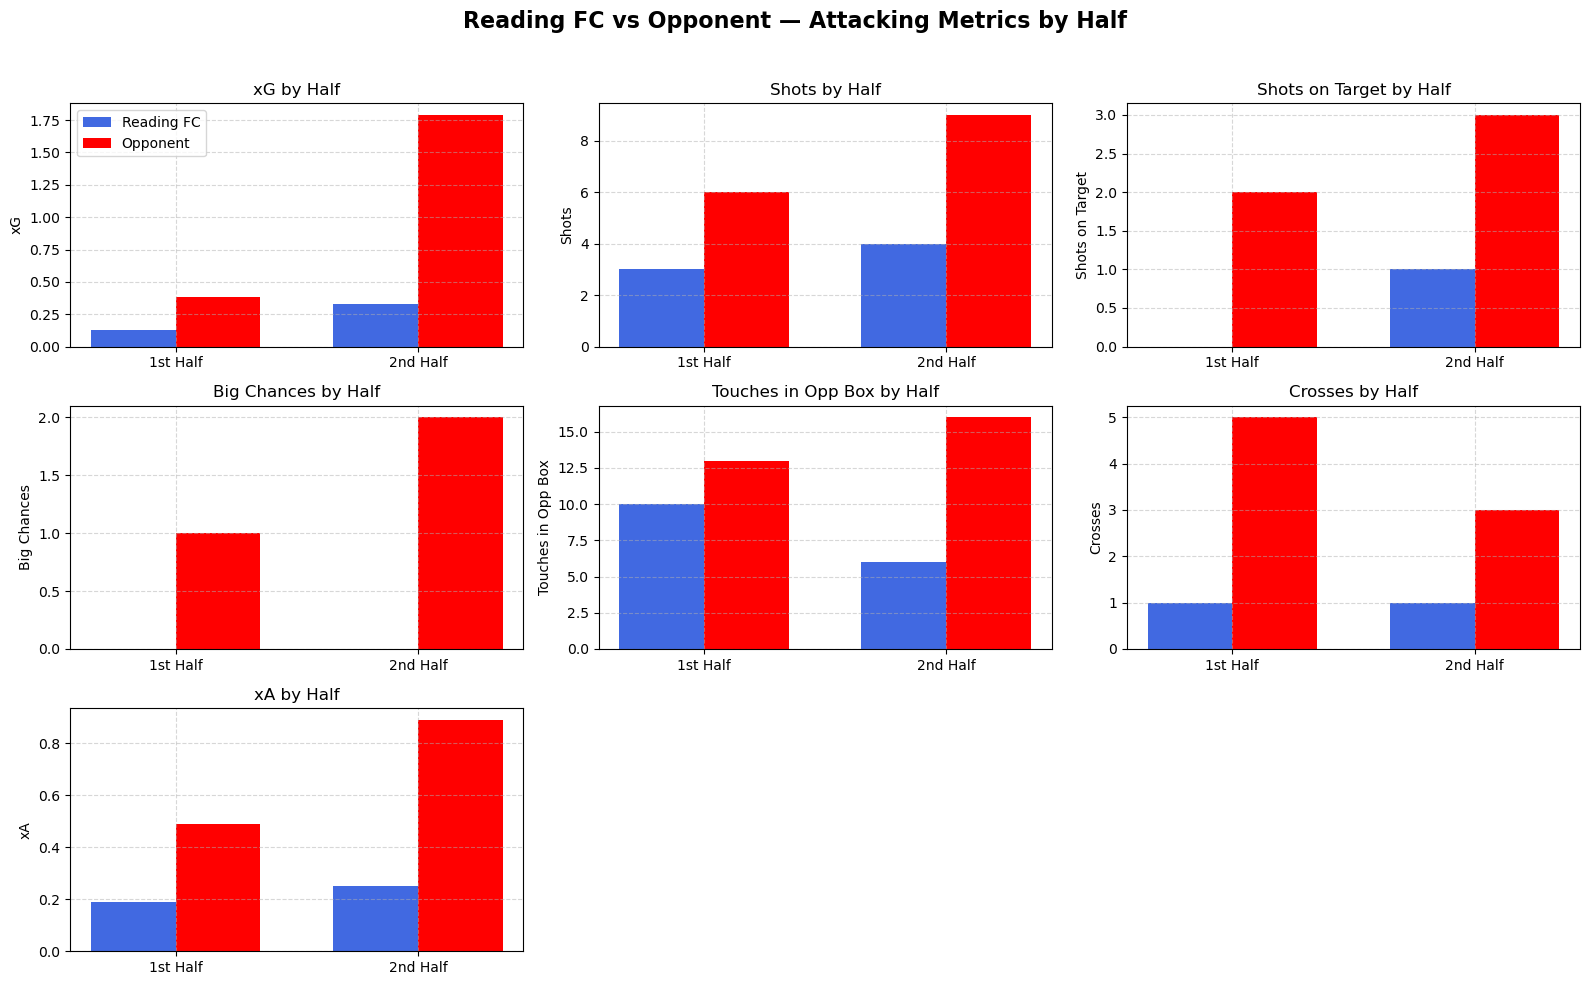

In [7]:
import matplotlib.pyplot as plt
import numpy as np

attacking_metrics = {
    "xG": [
        match['rfc_xG_1st'], match['opp_xG_1st'],
        match['rfc_xG_2nd'], match['opp_xG_2nd']
    ],
    "Shots": [
        match['rfc_Shots_1st'], match['opp_Shots_1st'],
        match['rfc_Shots_2nd'], match['opp_Shots_2nd']
    ],
    "Shots on Target": [
        match['rfc_SOT_1st'], match['opp_SOT_1st'],
        match['rfc_SOT_2nd'], match['opp_SOT_2nd']
    ],
    "Big Chances": [
        match['rfc_BigChances_1st'], match['opp_BigChances_1st'],
        match['rfc_BigChances_2nd'], match['opp_BigChances_2nd']
    ],
    "Touches in Opp Box": [
        match['rfc_Touches_In_Opp_Box_1st'], match['opp_Touches_In_Opp_Box_1st'],
        match['rfc_Touches_In_Opp_Box_2nd'], match['opp_Touches_In_Opp_Box_2nd']
    ],
    "Crosses": [
        match['rfc_Crosses_1st'], match['opp_Crosses_1st'],
        match['rfc_Crosses_2nd'], match['opp_Crosses_2nd']
    ],
    "xA": [
        match['rfc_xA_1st'], match['opp_xA_1st'],
        match['rfc_xA_2nd'], match['opp_xA_2nd']
    ],
}

# Plotting setup
fig, axs = plt.subplots(3, 3, figsize=(16, 10))
axs = axs.flatten()

x = np.arange(2)  # 1st Half, 2nd Half
width = 0.35

for idx, (metric, values) in enumerate(attacking_metrics.items()):
    rfc_1st, opp_1st, rfc_2nd, opp_2nd = values

    rfc_vals = [rfc_1st, rfc_2nd]
    opp_vals = [opp_1st, opp_2nd]

    ax = axs[idx]
    ax.bar(x - width/2, rfc_vals, width, color='royalblue', label='Reading FC')
    ax.bar(x + width/2, opp_vals, width, color='red', label='Opponent')

    ax.set_title(f"{metric} by Half")
    ax.set_xticks(x)
    ax.set_xticklabels(['1st Half', '2nd Half'])
    ax.set_ylabel(metric)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Show legend only once
    if idx == 0:
        ax.legend()

# Hide unused subplots
for j in range(len(attacking_metrics), len(axs)):
    axs[j].axis('off')

plt.suptitle("Reading FC vs Opponent — Attacking Metrics by Half",
             fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\arbry\AppData\Local\Temp\ipykernel_40068\507541331.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\arbry\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


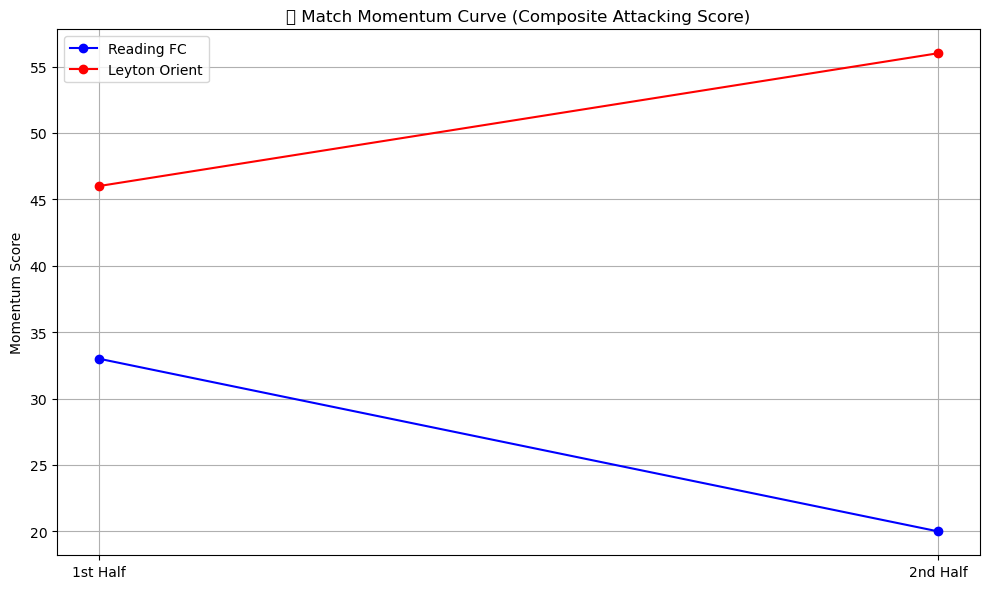

In [8]:
# Reading attacking intent per half (normalized)
rfc_attack_1st = (
    match['rfc_Shots_1st'] +
    match['rfc_Touches_In_Opp_Box_1st'] +
    match['rfc_Passes_In_Final_Third_1st']
)
rfc_attack_2nd = (
    match['rfc_Shots_2nd'] +
    match['rfc_Touches_In_Opp_Box_2nd'] +
    match['rfc_Passes_In_Final_Third_2nd']
)

opp_attack_1st = (
    match['opp_Shots_1st'] +
    match['opp_Touches_In_Opp_Box_1st'] +
    match['opp_Passes_In_Final_Third_1st']
)
opp_attack_2nd = (
    match['opp_Shots_2nd'] +
    match['opp_Touches_In_Opp_Box_2nd'] +
    match['opp_Passes_In_Finals_Third_2nd']
)

# Momentum score
rfc_momentum = [rfc_attack_1st, rfc_attack_2nd]
opp_momentum = [opp_attack_1st, opp_attack_2nd]

# Plot
plt.figure(figsize=(10, 6))
plt.plot([0, 1], rfc_momentum, label='Reading FC', color='blue', marker='o')
plt.plot([0, 1], opp_momentum, label='Leyton Orient', color='red', marker='o')

plt.xticks([0, 1], ['1st Half', '2nd Half'])
plt.title("📊 Match Momentum Curve (Composite Attacking Score)")
plt.ylabel("Momentum Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
touches_per_f3_pass = match['rfc_Touches_In_Opp_Box'] / match['rfc_Passes_In_Final_Third'] if match['rfc_Passes_In_Final_Third'] else 0
print(f"Final Third Penetration & Threat by Reading FC: {touches_per_f3_pass:.2f}")

Final Third Penetration & Threat by Reading FC: 0.53


# Match Attacking Performance Radar

In [10]:
import plotly.graph_objects as go

# Define attacking categories
attack_categories = ['xG', 'Shots', 'Shots on Target', 'Big Chances', 'xA', 'Touches in Opp Box']

# Raw values
reading_attack_vals = [
    match['rfc_xG_1st'] + match['rfc_xG_2nd'],
    match['rfc_Shots'],
    match['rfc_SOT'],
    match['rfc_BigChances'],
    match['rfc_xA_1st'] + match['rfc_xA_2nd'],
    match['rfc_Touches_In_Opp_Box_1st'] + match['rfc_Touches_In_Opp_Box_2nd'],
]

opp_attack_vals = [
    match['opp_xG_1st'] + match['opp_xG_2nd'],
    match['opp_Shots'],
    match['opp_SOT'],
    match['opp_BigChances'],
    match['opp_xA_1st'] + match['opp_xA_2nd'],
    match['opp_Touches_In_Opp_Box_1st'] + match['opp_Touches_In_Opp_Box_2nd'],
]

# Normalize (so each stat is 0–1 range)
max_vals = [max(r, o) if max(r, o) > 0 else 1 for r, o in zip(reading_attack_vals, opp_attack_vals)]
reading_norm = [r / m for r, m in zip(reading_attack_vals, max_vals)]
opp_norm = [o / m for o, m in zip(opp_attack_vals, max_vals)]

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=reading_norm + [reading_norm[0]],
    theta=attack_categories + [attack_categories[0]],
    fill='toself',
    name='Reading FC',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatterpolar(
    r=opp_norm + [opp_norm[0]],
    theta=attack_categories + [attack_categories[0]],
    fill='toself',
    name='Leyton Orient',
    line=dict(color='red')
))

# Layout tweaks
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1], showticklabels=False)
    ),
    title="Attacking Performance Radar: Reading FC vs Leyton Orient",
    showlegend=True
)

fig.show()


In [33]:
from math import isfinite

# --- Overall attacking output ---
reading_score = sum(reading_norm) / len(reading_norm)
opp_score     = sum(opp_norm) / len(opp_norm)

if opp_score == 0 and reading_score == 0:
    overall_msg = "Both teams had identical overall attacking output (all zeros after normalization)."
else:
    # Compare and express percent advantage relative to the lower score
    if reading_score >= opp_score:
        leader = "Reading FC"
        lagger = "Leyton Orient"
        pct = ((reading_score - opp_score) / opp_score * 100) if opp_score > 0 else float('inf')
    else:
        leader = "Leyton Orient"
        lagger = "Reading FC"
        pct = ((opp_score - reading_score) / reading_score * 100) if reading_score > 0 else float('inf')

    if isfinite(pct):
        overall_msg = f"{leader} had the higher overall attacking output by {pct:.1f}% (vs {lagger})."
    else:
        overall_msg = f"{leader} had higher overall attacking output; percent advantage is undefined because {lagger}'s score was 0."

print(overall_msg)

def pct_diff(a, b):
    """Percent advantage of a over b, relative to b."""
    if b == 0:
        if a == 0:
            return 0.0, "even (both 0)"
        else:
            return float('inf'), "∞ (opponent had 0)"
    return ((a - b) / b) * 100.0, None

rows = []
for cat, r_raw, o_raw in zip(attack_categories, reading_attack_vals, opp_attack_vals):
    if r_raw >= o_raw:
        winner, loser = "Reading FC", "Leyton Orient"
        pct, note = pct_diff(r_raw, o_raw)
    else:
        winner, loser = "Leyton Orient", "Reading FC"
        pct, note = pct_diff(o_raw, r_raw)

    pct_str = f"{pct:.1f}%" if isfinite(pct) else note or "∞"
    rows.append({
        "Category": cat,
        "Winner": winner,
        "By %": pct_str,
        "Reading": r_raw,
        "Leyton Orient": o_raw
    })

try:
    import pandas as pd
    df = pd.DataFrame(rows)
    print("\nPer-category differences:")
    print(df.to_string(index=False))
except Exception:
    print("\nPer-category differences:")
    for row in rows:
        print(f"{row['Category']}: {row['Winner']} by {row['By %']} "
              f"(Reading {row['Reading']} vs Leyton Orient {row['Leyton Orient']})")


Reading FC had higher overall attacking output; percent advantage is undefined because Leyton Orient's score was 0.

Per-category differences:
          Category        Winner               By %  Reading  Leyton Orient
                xG Leyton Orient             371.7%     0.46           2.17
             Shots Leyton Orient             114.3%     7.00          15.00
   Shots on Target Leyton Orient             400.0%     1.00           5.00
       Big Chances Leyton Orient ∞ (opponent had 0)     0.00           3.00
                xA Leyton Orient             213.6%     0.44           1.38
Touches in Opp Box Leyton Orient              81.2%    16.00          29.00


# Reading FC Game Control Analysis

- Looking at 1st Half vs 2nd Half comparison for match control
- Match momentum and Dominance
- Overall Game Control Performance

Game control metrics include:

- Possession
- Passes and Accuracy
- Long Passes and Accuracy
- Passes in Final Third and Accuracy

# 1st Half vs 2nd Half 

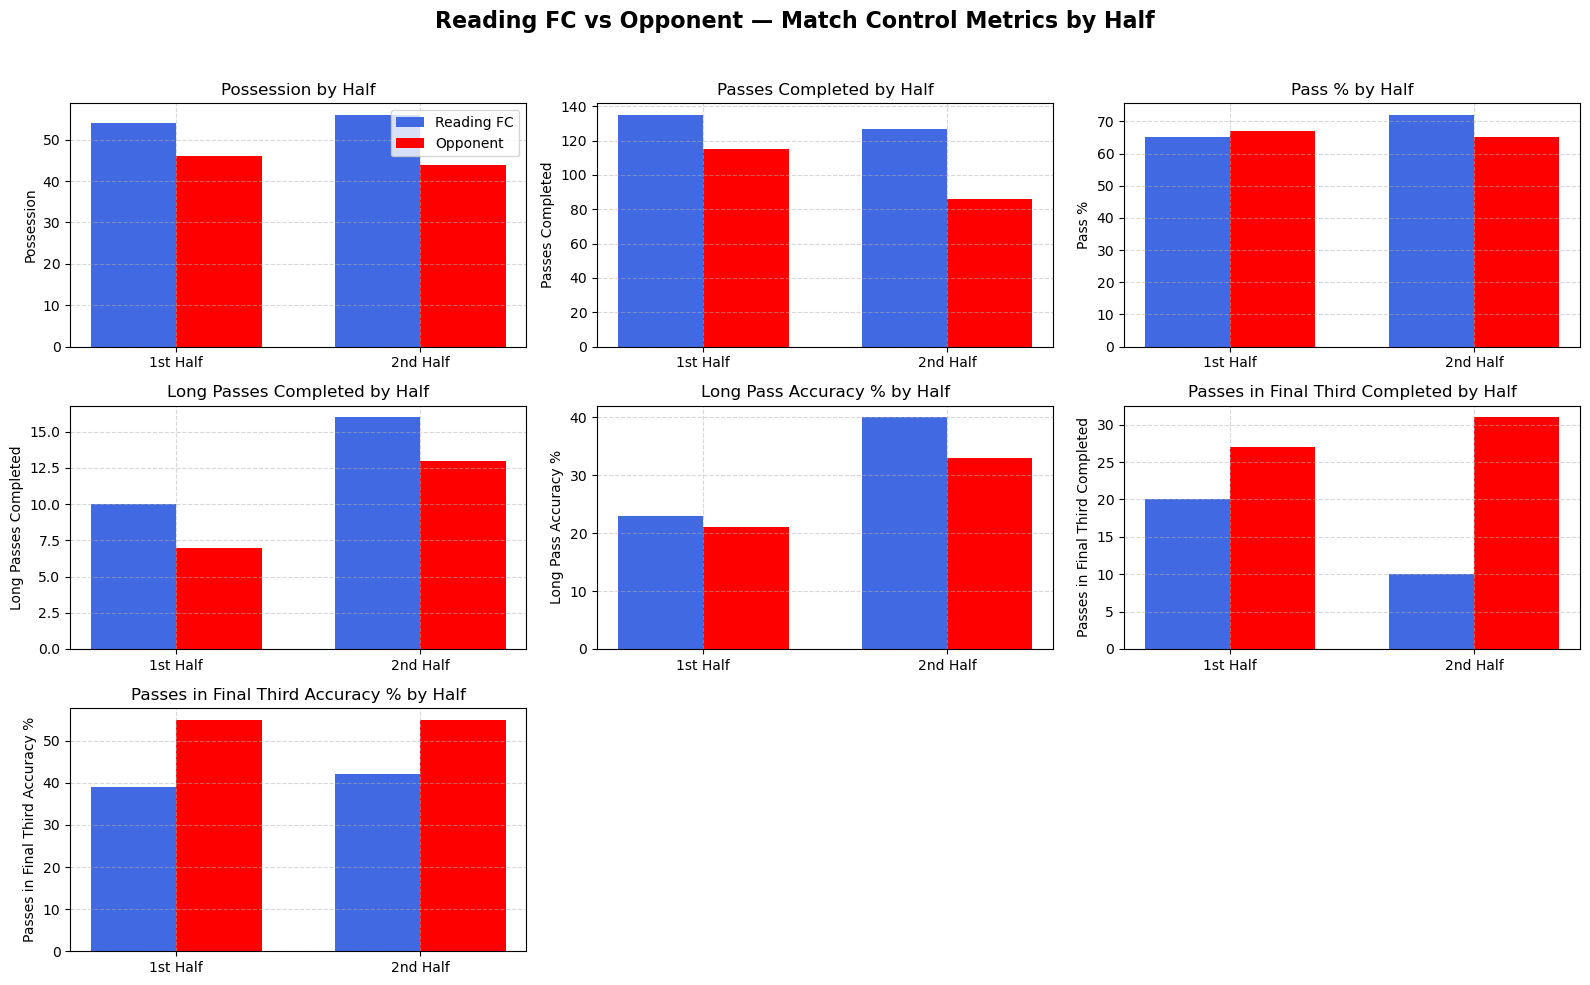

In [12]:


control_metrics = {
    "Possession": [
        match['rfc_Possession_1st'], match['opp_Possession_1st'],
        match['rfc_Possession_2nd'], match['opp_Possession_2nd']
    ],
    "Passes Completed": [
        match['rfc_Passes_1st'], match['opp_Passes_1st'],
        match['rfc_Passes_2nd'], match['opp_Passes_2nd']
    ],
    "Pass %": [
        match['rfc_Pass%_1st'], match['opp_Pass%_1st'],
        match['rfc_Pass%_2nd'], match['opp_Pass%_2nd']
    ],
    "Long Passes Completed": [
        match['rfc_Long_Passes_1st'], match['opp_Long_Passes_1st'],
        match['rfc_Long_Passes_2nd'], match['opp_Long_Passes_2nd']
    ],
    "Long Pass Accuracy %": [
        match['rfc_LongPass%_1st'], match['opp_LongPass%_1st'],
        match['rfc_LongPass%_2nd'], match['opp_LongPass%_2nd']
    ],
    "Passes in Final Third Completed": [
        match['rfc_Passes_In_Final_Third_1st'], match['opp_Passes_In_Final_Third_1st'],
        match['rfc_Passes_In_Final_Third_2nd'], match['opp_Passes_In_Finals_Third_2nd']
    ],
    "Passes in Final Third Accuracy %": [
        match['rfc_Pass_In_Final_Third%_1st'], match['opp_Pass_In_Final_Third%_1st'],
        match['rfc_Pass_In_Final_Third%_2nd'], match['opp_Pass_In_Final_Third%_2nd']
    ]
}

# Plotting setup:
fig, axs = plt.subplots(3, 3, figsize=(16, 10))
axs = axs.flatten()

# Bar positions (grouped by half)
x = np.arange(2)  # 0 = 1st half, 1 = 2nd half
width = 0.35

for idx, (metric, values) in enumerate(control_metrics.items()):
    rfc_1st, opp_1st, rfc_2nd, opp_2nd = values

    rfc_vals = [rfc_1st, rfc_2nd]
    opp_vals = [opp_1st, opp_2nd]

    ax = axs[idx]
    ax.bar(x - width/2, rfc_vals, width, label='Reading FC', color='royalblue')
    ax.bar(x + width/2, opp_vals, width, label='Opponent',  color='red')

    ax.set_title(f"{metric} by Half")
    ax.set_xticks(x)
    ax.set_xticklabels(['1st Half', '2nd Half'])
    ax.set_ylabel(metric)
    ax.grid(True, linestyle='--', alpha=0.5)

    # show legend once (first subplot) to keep it clean
    if idx == 0:
        ax.legend()

# Hide unused subplots
for j in range(len(control_metrics), len(axs)):
    axs[j].axis('off')

plt.suptitle("Reading FC vs Opponent — Match Control Metrics by Half", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [13]:
verticality = match['rfc_LongPass%'] / match['rfc_Pass%'] if match['rfc_Pass%'] else 0
print("Verticality Ratio (Long Pass% / Pass%):", round(verticality, 3))


Verticality Ratio (Long Pass% / Pass%): 0.456


C:\Users\arbry\AppData\Local\Temp\ipykernel_40068\3844312727.py:22: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

c:\Users\arbry\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.



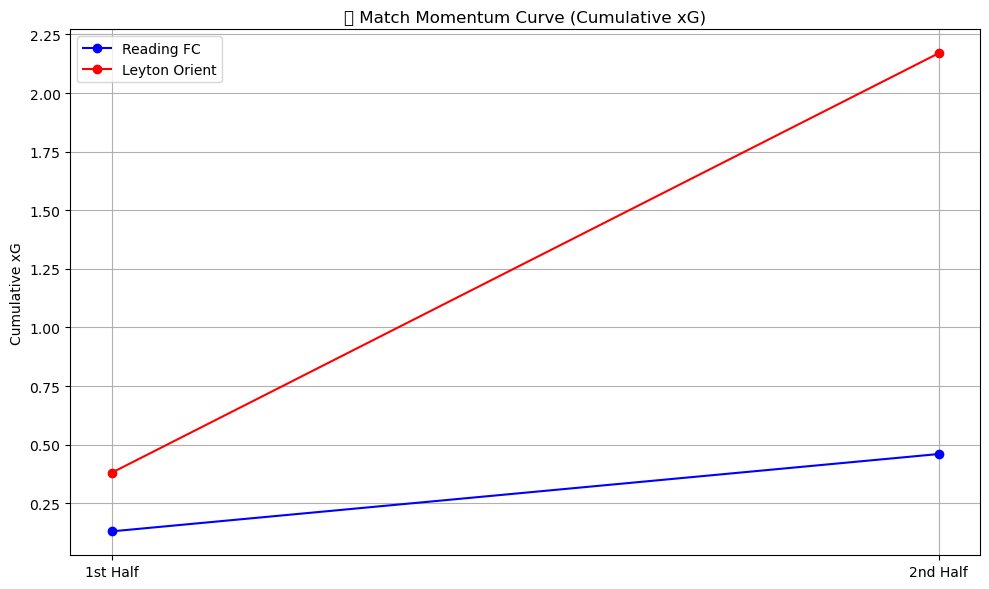

In [14]:
import matplotlib.pyplot as plt

# Get xG by half
rfc_xg = [match['rfc_xG_1st'], match['rfc_xG_2nd']]
opp_xg = [match['opp_xG_1st'], match['opp_xG_2nd']]

# Cumulative xG over halves
rfc_cumulative = [rfc_xg[0], rfc_xg[0] + rfc_xg[1]]
opp_cumulative = [opp_xg[0], opp_xg[0] + opp_xg[1]]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot([0, 1], rfc_cumulative, label='Reading FC', color='blue', marker='o')
plt.plot([0, 1], opp_cumulative, label='Leyton Orient', color='red', marker='o')

# Styling
plt.xticks([0, 1], ['1st Half', '2nd Half'])
plt.title("📈 Match Momentum Curve (Cumulative xG)")
plt.ylabel("Cumulative xG")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# Custom "dominance" index (normalize components first)
def normalize(val, max_val): 
    return val / max_val if max_val else 0

# ---- Overall match dominance ----
dominance_index = (
    0.4 * normalize(xg, xg + match['opp_xG_1st'] + match['opp_xG_2nd']) +
    0.2 * normalize(match['rfc_Possesion'], 100) +
    0.2 * normalize(match['rfc_SOT'], match['rfc_SOT'] + match['opp_SOT']) +
    0.2 * normalize(match['rfc_Passes'], match['rfc_Passes'] + match['opp_Passes'])
)

# ---- 1st Half dominance ----
dominance_index_1st = (
    0.4 * normalize(match['rfc_xG_1st'], match['rfc_xG_1st'] + match['opp_xG_1st']) +
    0.2 * normalize(match['rfc_Possession_1st'], 100) +
    0.2 * normalize(match['rfc_SOT_1st'], match['rfc_SOT_1st'] + match['opp_SOT_1st']) +
    0.2 * normalize(match['rfc_Passes_1st'], match['rfc_Passes_1st'] + match['opp_Passes_1st'])
)

# ---- 2nd Half dominance ----
dominance_index_2nd = (
    0.4 * normalize(match['rfc_xG_2nd'], match['rfc_xG_2nd'] + match['opp_xG_2nd']) +
    0.2 * normalize(match['rfc_Possession_2nd'], 100) +
    0.2 * normalize(match['rfc_SOT_2nd'], match['rfc_SOT_2nd'] + match['opp_SOT_2nd']) +
    0.2 * normalize(match['rfc_Passes_2nd'], match['rfc_Passes_2nd'] + match['opp_Passes_2nd'])
)

# ---- Print results ----
print(f"Match Dominance Index (0 to 1): {dominance_index:.2f}")
print(f"1st Half Dominance Index (0 to 1): {dominance_index_1st:.2f}")
print(f"2nd Half Dominance Index (0 to 1): {dominance_index_2nd:.2f}")


Match Dominance Index (0 to 1): 0.33
1st Half Dominance Index (0 to 1): 0.32
2nd Half Dominance Index (0 to 1): 0.34


In [16]:
ppda = match['opp_Passes'] / match['rfc_Tackles'] if match['rfc_Tackles'] else 0
ppda_1st = match['opp_Passes_1st'] / match['rfc_Tackles_1st'] if match['rfc_Tackles_1st'] else 0
ppda_2nd = match['opp_Passes_2nd'] / match['rfc_Tackles_2nd'] if match['rfc_Tackles_2nd'] else 0
print(f"Team Pressing by Reading FC: {ppda:.2f}, Team Pressing 1st Half: {ppda_1st:.2f}, Team Pressing 2nd Half: {ppda_2nd:.2f}")

Team Pressing by Reading FC: 18.27, Team Pressing 1st Half: 16.43, Team Pressing 2nd Half: 21.50


In [17]:
import plotly.graph_objects as go

OPP_LABEL = "Leyton Orient"

opp_label = match.get('opp_name', OPP_LABEL)

# --- Pull raw counts ---
r_all = match['rfc_Passes_In_Final_Third']
o_all = match['opp_Passes_In_Final_Third']

r_1st = match['rfc_Passes_In_Final_Third_1st']
o_1st = match['opp_Passes_In_Final_Third_1st']

r_2nd = match['rfc_Passes_In_Final_Third_2nd']
o_2nd = match['opp_Passes_In_Finals_Third_2nd']

def share(a, b):
    denom = a + b
    return (a / denom) if denom > 0 else 0.5

reading_share = [share(r_all, o_all), share(r_1st, o_1st), share(r_2nd, o_2nd)]
opp_share     = [1 - x for x in reading_share]
periods       = ["Overall", "1st Half", "2nd Half"]

# Convert to +/- percentages for diverging bars
reading_x = [s * 100 for s in reading_share]    # +%
opp_x     = [-(s * 100) for s in opp_share]     # -%

fig = go.Figure()

fig.add_trace(go.Bar(
    y=periods,
    x=opp_x,
    orientation='h',
    name=opp_label,
    text=[f"{abs(x):.0f}%" for x in opp_x],
    textposition='inside',
    insidetextanchor='middle',
    marker_color='crimson',
    hovertemplate=opp_label + " share: %{x}%<extra></extra>"
))

fig.add_trace(go.Bar(
    y=periods,
    x=reading_x,
    orientation='h',
    name="Reading FC",
    text=[f"{x:.0f}%" for x in reading_x],
    textposition='inside',
    insidetextanchor='middle',
    marker_color='royalblue',
    hovertemplate="Reading share: %{x}%<extra></extra>"
))

fig.update_layout(
    barmode='relative',
    title=f"Field Tilt (Share of Final-Third Passes): Reading FC vs {opp_label}",
    xaxis=dict(
        range=[-100, 100],
        tickvals=[-100, -75, -50, -25, 0, 25, 50, 75, 100],
        ticktext=['100%', '75%', '50%', '25%', '0%', '25%', '50%', '75%', '100%'],
        zeroline=True,
        zerolinewidth=2
    ),
    yaxis=dict(autorange='reversed'),
    bargap=0.2,
    showlegend=True,
    height=400
)

fig.add_vline(x=0, line_width=2, line_dash='dash', line_color='gray')
fig.show()

field_tilt     = share(r_all, o_all)
field_tilt_1st = share(r_1st, o_1st)
field_tilt_2nd = share(r_2nd, o_2nd)

print(f"Reading Field Tilt (Overall): {field_tilt:.2%}")
print(f"Reading Field Tilt (1st Half): {field_tilt_1st:.2%}")
print(f"Reading Field Tilt (2nd Half): {field_tilt_2nd:.2%}")


Reading Field Tilt (Overall): 34.09%
Reading Field Tilt (1st Half): 42.55%
Reading Field Tilt (2nd Half): 24.39%


# Match Game Control Performance Radar

In [18]:
# Define game control categories
control_categories = ['Possession', 'Passes', 'Long Passes', 'Long Pass Accuracy', 'Passes in Final Third', 'Passes in Final Third Accuracy']

# Raw values
reading_control_vals = [
    match['rfc_Possesion'],
    match['rfc_Passes'],
    match['rfc_Long_Passes'],
    match['rfc_LongPass%'],
    match['rfc_Passes_In_Final_Third'],
    match['rfc_Pass_In_Final_Third%'],
]

opp_control_vals = [
    match['opp_Possesion'],
    match['opp_Passes'],
    match['opp_Long_Passes'],
    match['opp_LongPass%'],
    match['opp_Passes_In_Final_Third'],
    match['opp_Pass_In_Final_Third%'],
]

# Normalize (so each stat is 0–1 range)
max_vals = [max(r, o) if max(r, o) > 0 else 1 for r, o in zip(reading_control_vals, opp_control_vals)]
reading_norm = [r / m for r, m in zip(reading_control_vals, max_vals)]
opp_norm = [o / m for o, m in zip(opp_control_vals, max_vals)]

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=reading_norm + [reading_norm[0]],
    theta=control_categories + [control_categories[0]],
    fill='toself',
    name='Reading FC',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatterpolar(
    r=opp_norm + [opp_norm[0]],
    theta=control_categories + [control_categories[0]],
    fill='toself',
    name='Leyton Orient',
    line=dict(color='red')
))

# Layout tweaks
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1], showticklabels=False)
    ),
    title="Game Control Performance Radar: Reading FC vs Leyton Orient",
    showlegend=True
)

fig.show()

# Defensive Stats Analysis

- Looking at 1st Half vs 2nd Half comparison for the defensive metrics
- Defensive occurance
- Overall Defensive Performance

Defensive metrics include:

- Fouls
- Tackles and Accuracy
- Duels Won
- Clearances
- Interceptions


# 1st Half vs 2nd Half 

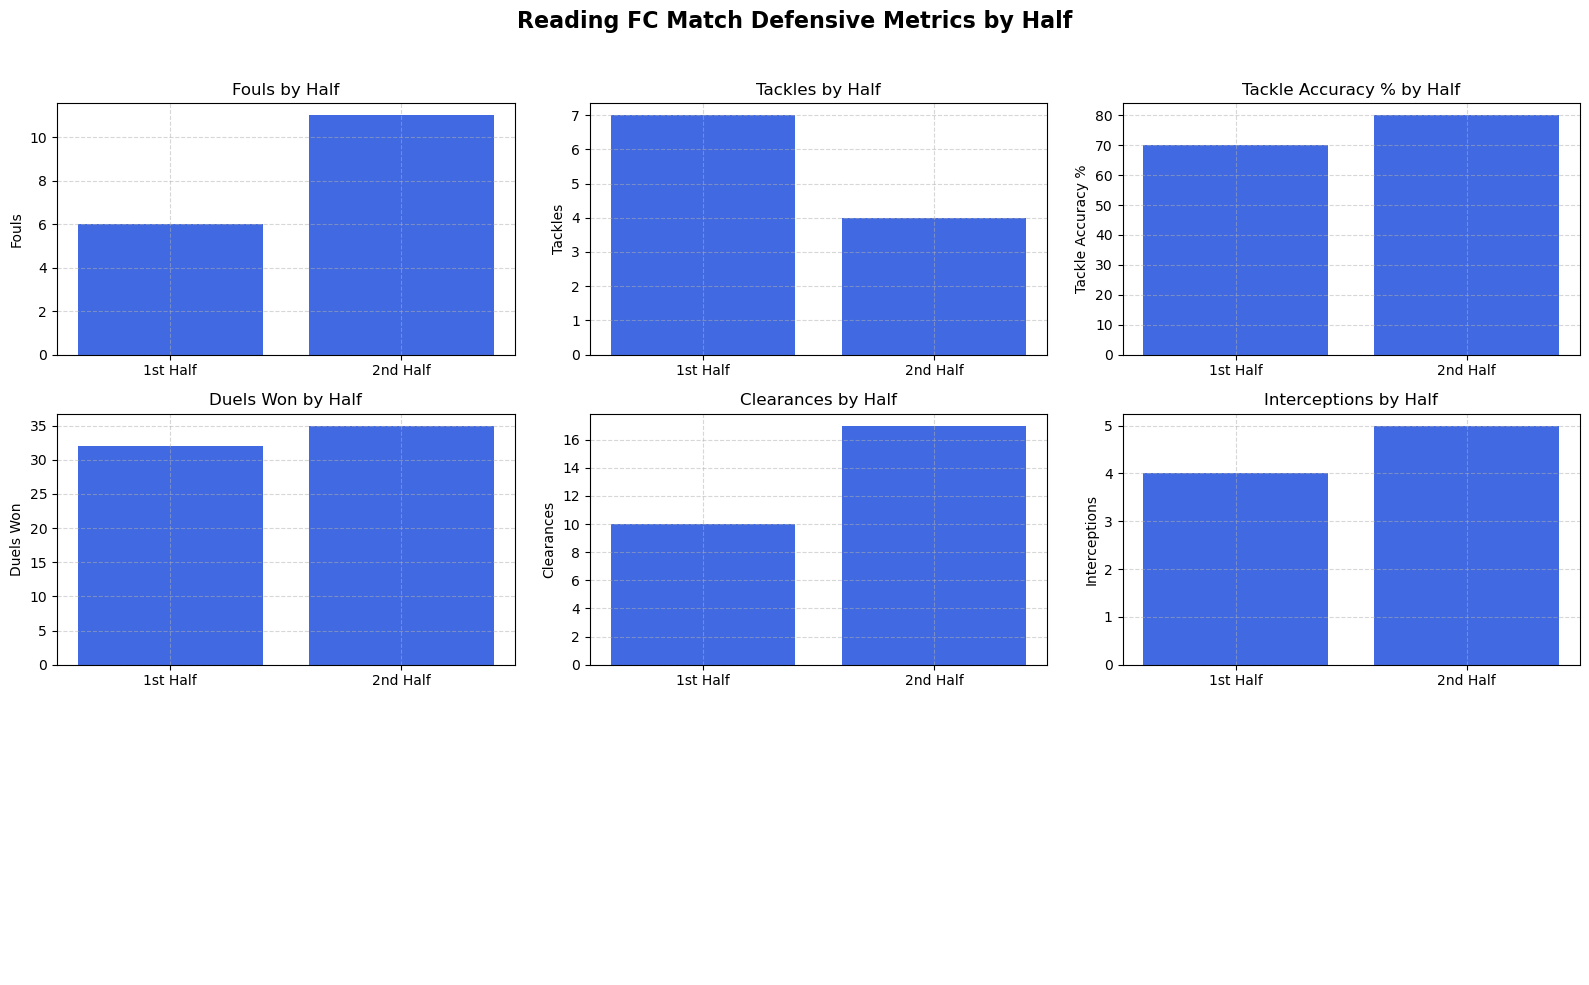

In [19]:
defensive_metrics = {
    "Fouls": [match['rfc_Fouls_1st'], match['rfc_Fouls_2nd']],
    "Tackles": [match['rfc_Tackles_1st'], match['rfc_Tackles_2nd']],
    "Tackle Accuracy %": [match['rfc_Tackle%_1st'], match['rfc_Tackle%_2nd']],
    "Duels Won": [match['rfc_Duels_Won_1st'], match['rfc_Duels_Won_2nd']],
    "Clearances": [match['rfc_Clearances_1st'], match['rfc_Clearances_2nd']],
    "Interceptions": [match['rfc_Interceptions_1st'], match['rfc_Interceptions_2nd']]
}

# Plotting setup: 
fig, axs = plt.subplots(3, 3, figsize=(16, 10))
axs = axs.flatten()  # Flatten for easy indexing

# Plot each metric
for idx, (metric, values) in enumerate(defensive_metrics.items()):
    axs[idx].bar(['1st Half', '2nd Half'], values, color='royalblue')
    axs[idx].set_title(f"{metric} by Half")
    axs[idx].set_ylabel(metric)
    axs[idx].grid(True, linestyle='--', alpha=0.5)

# Hide any unused subplots (in case of uneven grid)
for j in range(len(defensive_metrics), len(axs)):
    axs[j].axis('off')

plt.suptitle("Reading FC Match Defensive Metrics by Half", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [20]:
opp_attacks = match['opp_Passes_In_Final_Third'] + match['opp_Touches_In_Opp_Box']
rfc_def_actions = match['rfc_Tackles'] + match['rfc_Clearances'] + match['rfc_Interceptions']

def_efficiency = rfc_def_actions / opp_attacks if opp_attacks else 0
print(f"Reading Defensive Efficiency: {def_efficiency:.2f} actions per opp attack")


Reading Defensive Efficiency: 0.54 actions per opp attack


In [21]:
tackle_eff = match['rfc_Tackles'] * (match['rfc_Tackle%'] / 100)
print(f"Tackles Won by Reading FC: {tackle_eff:.2f}")


Tackles Won by Reading FC: 8.03


In [22]:
defensive_actions_reading = match['rfc_Tackles'] + match['rfc_Clearances'] + match['rfc_Interceptions']
defensive_actions_opp = match['opp_Tackles'] + match['opp_Clearances'] + match['opp_Interceptions']

print(f"Total Defensive Actions by Reading FC: {defensive_actions_reading}")
print(f"Total Defensive Actions by Leyton Orient: {defensive_actions_opp}")

Total Defensive Actions by Reading FC: 47
Total Defensive Actions by Leyton Orient: 37


In [23]:
touches_per_f3_pass = match['opp_Touches_In_Opp_Box'] / match['opp_Passes_In_Final_Third'] if match['opp_Passes_In_Final_Third'] else 0
print(f"Final Third Penetration & Threat by Leyton Orient: {touches_per_f3_pass:.2f}")

Final Third Penetration & Threat by Leyton Orient: 0.50


In [24]:
def_resistance_index = def_efficiency / touches_per_f3_pass if touches_per_f3_pass else 0
print(f"Reading Defensive Resistance Index: {def_resistance_index:.2f}")


Reading Defensive Resistance Index: 1.08


In [25]:
opp_shots_in_box = match['opp_Shots_Inside_Box']
opp_total_shots = match['opp_Shots']
opp_shot_danger = opp_shots_in_box / opp_total_shots if opp_total_shots else 0

print(f"Stockport Shot Danger Ratio (Inside Box %): {opp_shot_danger:.2%}")


Stockport Shot Danger Ratio (Inside Box %): 73.33%


In [26]:
# Simple proxy: shots created vs defensive actions won
transition_eff = match['rfc_Shots'] / rfc_def_actions if rfc_def_actions else 0
print(f"Reading Transition Efficiency: {transition_eff:.2f} shots per defensive action")


Reading Transition Efficiency: 0.15 shots per defensive action


In [27]:
opp_f3_acc = match['opp_Pass_In_Final_Third%']
print(f"Leyton Orient Final Third Pass Accuracy: {opp_f3_acc:.1f}%")


Leyton Orient Final Third Pass Accuracy: 55.0%


# Match Defensive Performance Radar

In [28]:
# Define game control categories
defensive_categories = ['Fouls', 'Tackles', 'Tackle Accuracy', 'Duels Won', 'Clearances', 'Interceptions']

# Raw values
reading_defensive_vals = [
    match['rfc_Fouls'],
    match['rfc_Tackles'],
    match['rfc_Tackle%'],
    match['rfc_Duels_Won'],
    match['rfc_Clearances'],
    match['rfc_Interceptions'],
]

opp_defensive_vals = [
    match['opp_Fouls'],
    match['opp_Tackles'],
    match['opp_Tackle%'],
    match['opp_Duels_Won'],
    match['opp_Clearances'],
    match['opp_Interceptions'],
]

# Normalize (so each stat is 0–1 range)
max_vals = [max(r, o) if max(r, o) > 0 else 1 for r, o in zip(reading_defensive_vals, opp_defensive_vals)]
reading_norm = [r / m for r, m in zip(reading_defensive_vals, max_vals)]
opp_norm = [o / m for o, m in zip(opp_defensive_vals, max_vals)]

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=reading_norm + [reading_norm[0]],
    theta=defensive_categories + [defensive_categories[0]],
    fill='toself',
    name='Reading FC',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatterpolar(
    r=opp_norm + [opp_norm[0]],
    theta=defensive_categories + [defensive_categories[0]],
    fill='toself',
    name='Leyton Orient',
    line=dict(color='red')
))

# Layout tweaks
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1], showticklabels=False)
    ),
    title="Defensive Performance Radar: Reading FC vs Leyton Orient",
    showlegend=True
)

fig.show()

# Goalkeeper Analysis

- Looking at 1st Half vs 2nd Half Goalkeeper metrics
- Goalkeeping efficiency
- Overall Goalkeeper Performance

Goalkeeper metrics include:

- Saves
- xGOT Faced = Expected Goals on Target
- Goals Prevented

# 1st Half vs 2nd Half

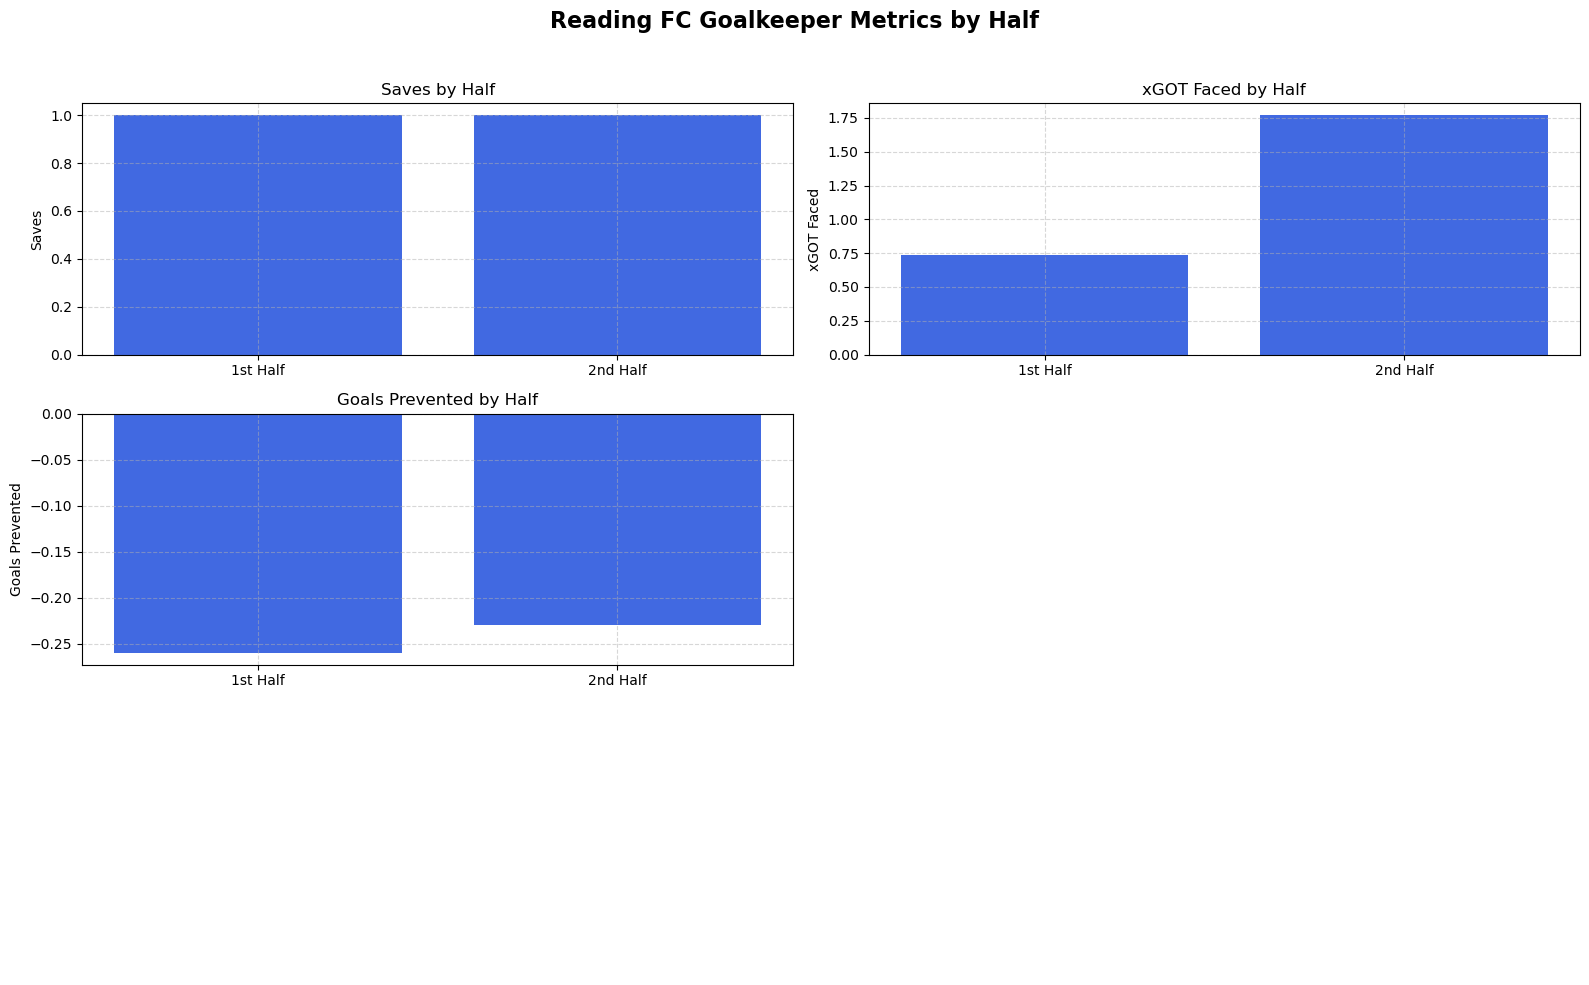

In [29]:
goalkeeper_metrics = {
    "Saves": [match['rfc_GK_Saves_1st'], match['rfc_GK_Saves_2nd']],
    "xGOT Faced": [match['rfc_xGOT_Faced_1st'], match['rfc_xGOT_Faced_2nd']],
    "Goals Prevented": [match['rfc_GK_Goals_Prevented_1st'], match['rfc_GK_Goals_Prevented_2nd']]
}

# Plotting setup: 
fig, axs = plt.subplots(3, 2, figsize=(16, 10))
axs = axs.flatten()  # Flatten for easy indexing

# Plot each metric
for idx, (metric, values) in enumerate(goalkeeper_metrics.items()):
    axs[idx].bar(['1st Half', '2nd Half'], values, color='royalblue')
    axs[idx].set_title(f"{metric} by Half")
    axs[idx].set_ylabel(metric)
    axs[idx].grid(True, linestyle='--', alpha=0.5)

# Hide any unused subplots (in case of uneven grid)
for j in range(len(goalkeeper_metrics), len(axs)):
    axs[j].axis('off')

plt.suptitle("Reading FC Goalkeeper Metrics by Half", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [30]:
# Shot-stopping performance
xGOT_faced = match['rfc_xGOT_Faced']
saves = match['rfc_GK_Saves']
goals = match['opp_Score']

gk_performance = {
    "xGOT Faced": xGOT_faced,
    "Saves Made": saves,
    "Goals Conceded": goals,
    "Goals Prevented": match['rfc_GK_Goals_Prevented'],
    "Save Rate vs xGOT": (saves - xGOT_faced) if xGOT_faced else 0
}

print(pd.Series(gk_performance))


xGOT Faced           2.51
Saves Made           2.00
Goals Conceded       3.00
Goals Prevented     -0.49
Save Rate vs xGOT   -0.51
dtype: float64


In [31]:
save_eff = match['rfc_GK_Saves'] / match['opp_SOT'] if match['opp_SOT'] else 0
print(f"Save Efficiency by Reading FC: {save_eff:.2f}")

Save Efficiency by Reading FC: 0.40


In [32]:
# Define Goalkeeper categories
goalkeeper_categories = ['Saves', 'xGOT', 'Goals Prevented']

# Raw values
reading_goalkeeper_vals = [
    match['rfc_GK_Saves'],
    match['rfc_xGOT_Faced'],
    match['rfc_GK_Goals_Prevented']
]

opp_goalkeeper_vals = [
    match['opp_GK_Saves'],
    match['opp_xGOT_Faced'],
    match['opp_GK_Goals_Prevented']
]

# Normalize (so each stat is 0–1 range)
max_vals = [max(r, o) if max(r, o) > 0 else 1 for r, o in zip(reading_goalkeeper_vals, opp_goalkeeper_vals)]
reading_norm = [r / m for r, m in zip(reading_goalkeeper_vals, max_vals)]
opp_norm = [o / m for o, m in zip(opp_goalkeeper_vals, max_vals)]

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=reading_norm + [reading_norm[0]],
    theta=goalkeeper_categories + [goalkeeper_categories[0]],
    fill='toself',
    name='Reading FC',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatterpolar(
    r=opp_norm + [opp_norm[0]],
    theta=goalkeeper_categories + [goalkeeper_categories[0]],
    fill='toself',
    name='Leyton Orient',
    line=dict(color='red')
))

# Layout tweaks
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1], showticklabels=False)
    ),
    title="Goalkeeper Performance Radar: Reading FC vs Leyton Orient",
    showlegend=True
)

fig.show()